In [50]:
#import libraries
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame

# Business understanding

# Questions:

 
 Q1 which are the top 5 countries conducting the survey?

Q2 How many types of answers included in 'Professional' column ?

Q3 Comparison Professional with each top five countries
 
 Q4 Comparison top five countries togther with Professional

 Q5 How many types of answers included in 'FormalEducation' column


Q6 How many types of answers included in 'EmploymentStatus' column

Q7 how many years program vs Salary

## 2. Data Understanding

In [51]:
df= pd.read_csv("survey_results_public.csv")
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data preparation

In [52]:
df.describe()


,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


In [54]:
num_row= df.shape[0]
num_col= df.shape[1]
print("number of rows: {}".format(num_row))
print("number of columns: {}".format(num_col))

number of rows: 51392
number of columns: 154


In [55]:
df.isnull().sum()

Respondent                         0
Professional                       0
ProgramHobby                       0
Country                            0
University                         0
EmploymentStatus                   0
FormalEducation                    0
MajorUndergrad                  8551
HomeRemote                      7384
CompanySize                    12470
CompanyType                    12569
YearsProgram                     247
YearsCodedJob                  10502
YearsCodedJobPast              50418
DeveloperType                  15267
WebDeveloperType               40696
MobileDeveloperType            49839
NonDeveloperType               46502
CareerSatisfaction              8697
JobSatisfaction                11016
ExCoderReturn                  50469
ExCoderNotForMe                50471
ExCoderBalance                 50469
ExCoder10Years                 50475
ExCoderBelonged                50464
ExCoderSkills                  50457
ExCoderWillNotCode             50470
E

In [56]:
df.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [57]:

#drop innecessary columns

col_to_drop=['Respondent','ProgramHobby','HomeRemote','YearsCodedJob','YearsCodedJobPast','DeveloperType','WebDeveloperType','MobileDeveloperType',
'NonDeveloperType','ExCoderReturn','ExCoderNotForMe','ExCoderBalance','ExCoder10Years','ExCoderBelonged','ExCoderSkills','ExCoderWillNotCode',
'ExCoderActive','ProblemSolving','BuildingThings','LearningNewTech','BoringDetails','JobSecurity','DiversityImportant','AnnoyingUI','FriendsDevelopers',
'RightWrongWay','UnderstandComputers','SeriousWork','InvestTimeTools','WorkPayCare','KinshipDevelopers','ChallengeMyself','CompetePeers','ChangeWorld','JobSeekingStatus',
'HoursPerWeek','LastNewJob','AssessJobIndustry','AssessJobRole','AssessJobExp','AssessJobDept','AssessJobTech','AssessJobProjects','AssessJobCompensation','AssessJobOffice',
'AssessJobCommute','AssessJobRemote','AssessJobLeaders','AssessJobProfDevel','AssessJobDiversity','AssessJobProduct','AssessJobFinances','ImportantBenefits',
'ClickyKeys','JobProfile','ResumePrompted','LearnedHiring','ImportantHiringAlgorithms','ImportantHiringTechExp','ImportantHiringCommunication','ImportantHiringOpenSource',
'ImportantHiringPMExp','ImportantHiringCompanies','ImportantHiringTitles','ImportantHiringEducation','ImportantHiringRep','ImportantHiringGettingThingsDone','Currency',
'Overpaid','TabsSpaces','EducationImportant','EducationTypes','SelfTaughtTypes','TimeAfterBootcamp','CousinEducation','WorkStart','HaveWorkedLanguage','WantWorkLanguage',
'HaveWorkedFramework','WantWorkFramework','HaveWorkedDatabase','WantWorkDatabase','HaveWorkedPlatform','WantWorkPlatform','IDE','AuditoryEnvironment','Methodology',
'VersionControl','CheckInCode','ShipIt','OtherPeoplesCode','ProjectManagement','EnjoyDebugging','InTheZone','DifficultCommunication','CollaborateRemote',
'MetricAssess','EquipmentSatisfiedMonitors','EquipmentSatisfiedCPU','EquipmentSatisfiedRAM','EquipmentSatisfiedStorage','EquipmentSatisfiedRW','InfluenceInternet',  
'InfluenceWorkstation','InfluenceHardware','InfluenceServers','InfluenceTechStack','InfluenceDeptTech','InfluenceVizTools','InfluenceDatabase','InfluenceCloud','InfluenceConsultants',
'InfluenceRecruitment','InfluenceCommunication','HighestEducationParents','Race','SurveyLong','QuestionsInteresting','QuestionsConfusing','InterestedAnswers']
df.drop(col_to_drop,axis=1,inplace=True)

In [58]:
df.head()

,Professional,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,CompanySize,CompanyType,YearsProgram,CareerSatisfaction,...,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,Salary,ExpectedSalary
0,Student,United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,2 to 3 years,NaN,...,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,NaN,NaN
1,Student,United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,20 to 99 employees,"Privately-held limited company, not in startup...",9 to 10 years,NaN,...,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,NaN,37500.0
2,Professional developer,United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"10,000 or more employees",Publicly-traded corporation,20 or more years,8.0,...,Disagree,Strongly disagree,Strongly agree,Agree,Agree,Agree,Disagree,Male,113750.0,NaN
3,Professional non-developer who sometimes write...,United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"10,000 or more employees",Non-profit/non-governmental organization or pr...,14 to 15 years,6.0,...,Strongly disagree,Strongly disagree,Strongly agree,Strongly agree,Agree,Strongly agree,Disagree,Male,NaN,NaN
4,Professional developer,Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,10 to 19 employees,"Privately-held limited company, not in startup...",20 or more years,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data modeling

#  Q1 which are the top 5 countries conducting the survey?

In [59]:
#select the top 5 countries conducting the survey 
top_country=df['Country'].value_counts()
top_five=top_country.head()
print(top_five)

United States     11455
India              5197
United Kingdom     4395
Germany            4143
Canada             2233
Name: Country, dtype: int64


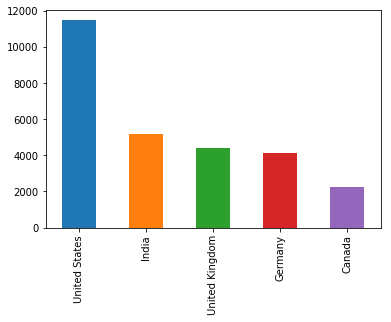

In [60]:
top_five.plot(x='Country', kind='bar')

 As we see number 1 of  top 5 countries conducting the survey was  United States

# Q2 How many types of answers included in 'Professional' column ? 

In [61]:
top_professional=df['Professional'].value_counts()
print(top_professional.head())
index=['Professional developer','Student','Professional non-developer who sometimes writes code','Used to be a professional developer','None of these']


Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64


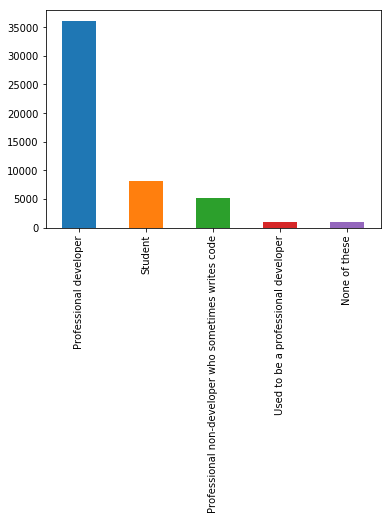

In [85]:
top_professional.plot(x='Professional', kind='bar')

as we see most of them they  Professional developer

# Q3 Comparison Professional with each top five countries 

Professional developer                                  8310
Student                                                 1456
Professional non-developer who sometimes writes code    1199
None of these                                            247
Used to be a professional developer                      243
Name: Professional, dtype: int64

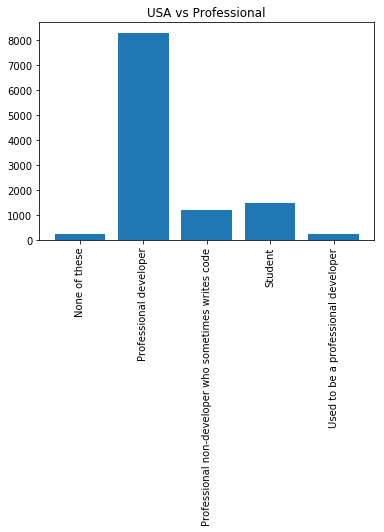

In [87]:
 # top_professional vs top_country (USA)
USA_Professional=df['Professional'][df['Country']=='United States']
number_usa=USA_Professional.value_counts()
plt.xticks(rotation='90')
plt.title('USA vs Professional')
plt.bar(index,number_usa)
number_usa

Professional developer                                  3438
Student                                                 1162
Professional non-developer who sometimes writes code     439
Used to be a professional developer                      104
None of these                                             54
Name: Professional, dtype: int64

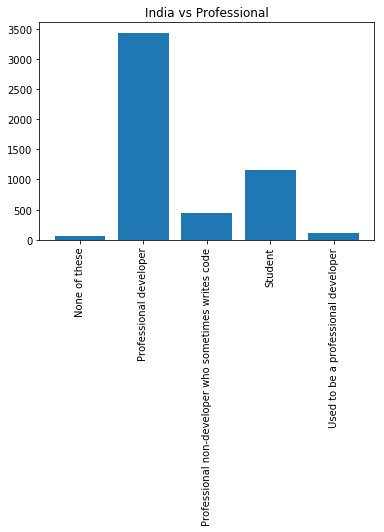

In [64]:
 # top_professional vs top_country (India)
India_Professional=df['Professional'][df['Country']=='India']
number_India=India_Professional.value_counts()
plt.xticks(rotation='90')
plt.title('India vs Professional')
plt.bar(index,number_India)
number_India

Professional developer                                  3302
Student                                                  530
Professional non-developer who sometimes writes code     405
None of these                                             82
Used to be a professional developer                       76
Name: Professional, dtype: int64

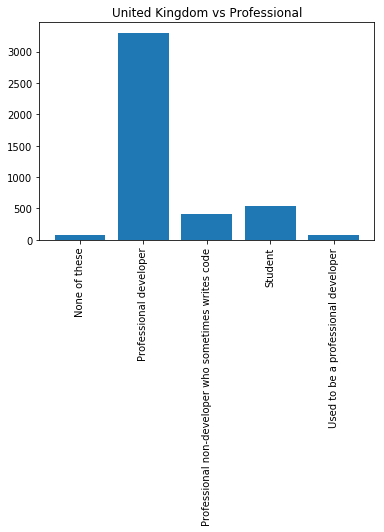

In [65]:
 # top_professional vs top_country (United Kingdom)
United_Kingdom_Professional=df['Professional'][df['Country']=='United Kingdom']
number_United_Kingdom=United_Kingdom_Professional.value_counts()
plt.xticks(rotation='90')
plt.title('United Kingdom vs Professional')
plt.bar(index,number_United_Kingdom)
number_United_Kingdom

Professional developer                                  2767
Student                                                  731
Professional non-developer who sometimes writes code     493
None of these                                             91
Used to be a professional developer                       61
Name: Professional, dtype: int64

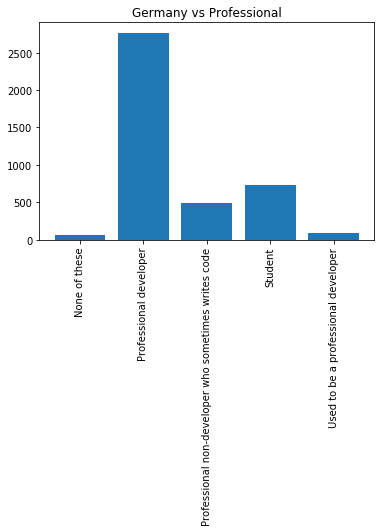

In [66]:
 # top_professional vs top_country (Germany)
Germany_Professional=df['Professional'][df['Country']=='Germany']
number_Germany=Germany_Professional.value_counts()
plt.xticks(rotation='90')
plt.title('Germany vs Professional')
plt.bar(index,number_Germany)
number_Germany

Professional developer                                  1605
Student                                                  355
Professional non-developer who sometimes writes code     186
Used to be a professional developer                       52
None of these                                             35
Name: Professional, dtype: int64

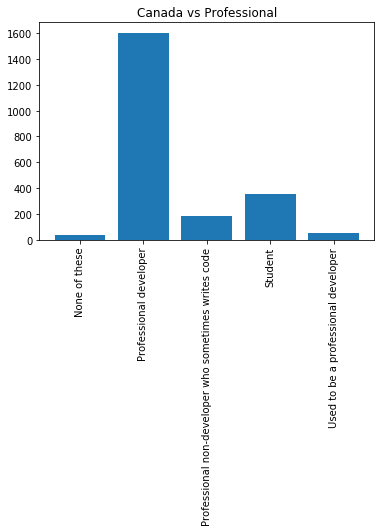

In [67]:
 # top_professional vs top_country (Canada)
Canada_Professional=df['Professional'][df['Country']=='Canada']
number_Canada=Canada_Professional.value_counts()
plt.xticks(rotation='90')
plt.title('Canada vs Professional')
plt.bar(index,number_Canada)
number_Canada

# Q4 Comparison  top five countries togther with Professional 

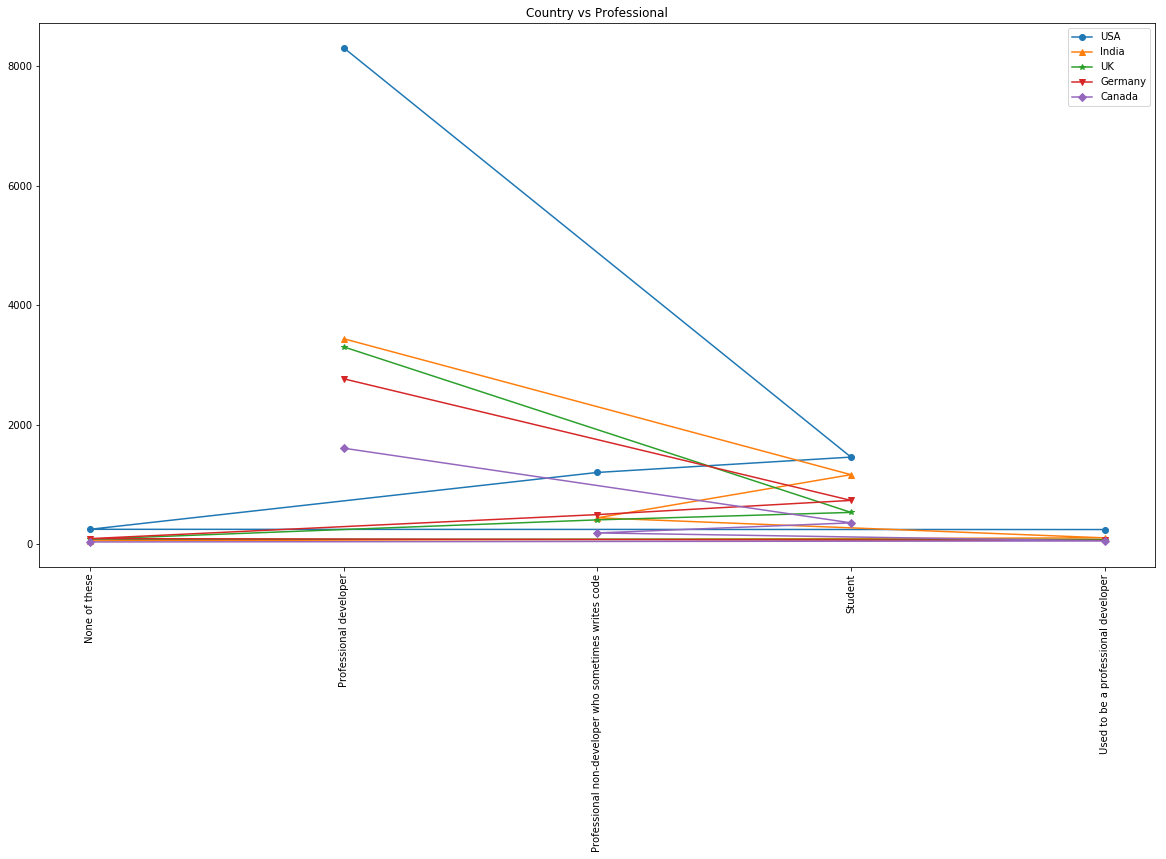

In [68]:
plt.figure(figsize=(20,10))
plt.plot(number_usa,label='USA',marker='o')
plt.plot(number_India,label='India',marker='^')
plt.plot(number_United_Kingdom,label='UK',marker='*')
plt.plot(number_Germany,label='Germany',marker='v')
plt.plot(number_Canada,label='Canada',marker='D')
plt.xticks(rotation='vertical')
plt.title('Country vs Professional')
plt.legend()
plt.show()

AS we seen USA have most they using stackoverflow ,also India and UK the have approximaitly around 4000 

# Q5 How many types of answers included in 'FormalEducation' column

In [69]:
FormalEducation=df['FormalEducation'].value_counts()
FormalEducation.head()

Bachelor's degree                                                    21609
Master's degree                                                      11141
Some college/university study without earning a bachelor's degree     8129
Secondary school                                                      5908
Doctoral degree                                                       1308
Name: FormalEducation, dtype: int64

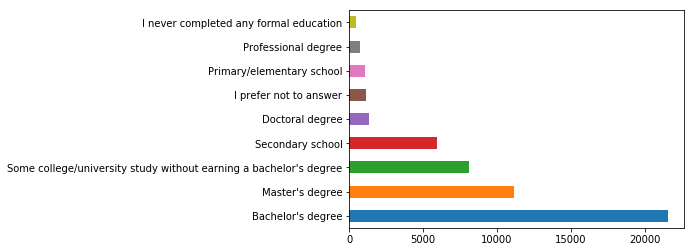

In [90]:
FormalEducation.plot(x='FormalEducation', kind='barh')

AS we seen most of them they have Bachelor's degree  

# Q6 How many types of answers included in 'EmploymentStatus' column

In [71]:
EmploymentStatus=df['EmploymentStatus'].value_counts()
EmploymentStatus.head()


Employed full-time                                      36148
Independent contractor, freelancer, or self-employed     5233
Employed part-time                                       3180
Not employed, and not looking for work                   2791
Not employed, but looking for work                       2786
Name: EmploymentStatus, dtype: int64

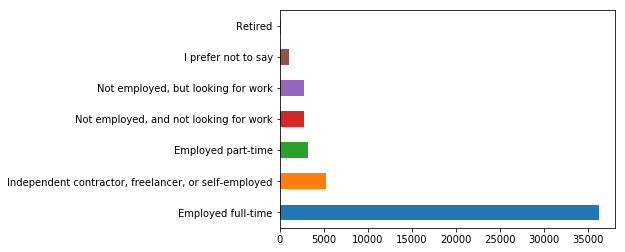

In [91]:
EmploymentStatus.plot(x='EmploymentStatus', kind='barh')

as we see most of them they work Employed full-time

# Q7  how many years program vs Salary 

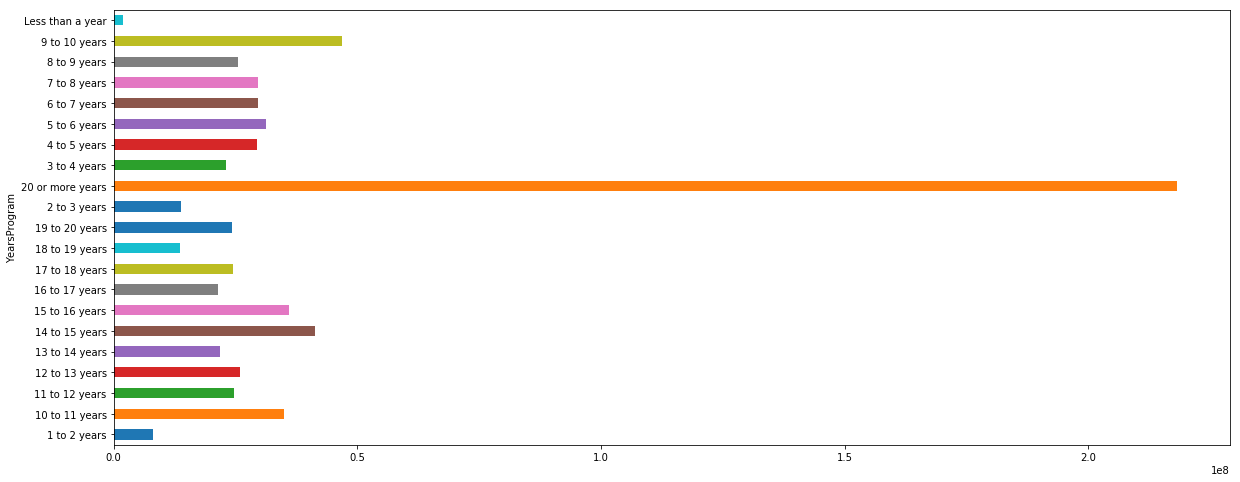

In [89]:
plt.figure(figsize = (20,8))
df.groupby ('YearsProgram')['Salary'].sum().plot('barh')

 as we see  20 or more years they get larger salary 

# Results evaluation:
 
 1/ Top five country USA , India, UK , Germany and canada useing stackoverflow 

 2/ Most of pepole they answered Professional they are professional developer next student and Professional non-developer who sometimes writes code

3/ Most of them they have Bachelor's degree  education 
4/ Most of them they are working as full-time jobs  next Independent contractor, freelancer, or self-employed  

